read data
read data


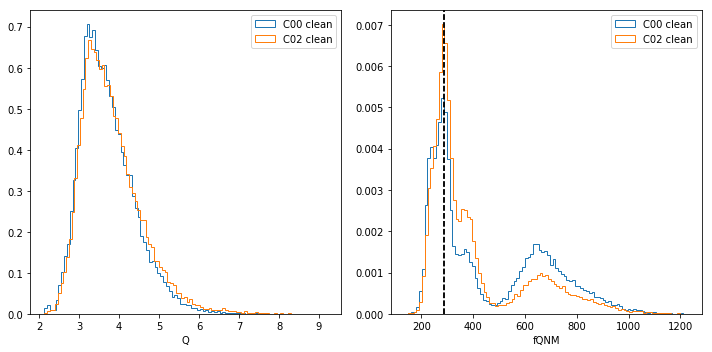

In [6]:
#m1, m2, chi1, chi2 = 33.5405393466, 33.5405393466, 0.38579031792, 0.119593857525

import numpy as np
import matplotlib.pyplot as plt
import lal, os, numpy as np
import matplotlib.pyplot as plt
import nr_fits as nr

post_loc_c00 = './Run4c_20171210_HLV_IMRPPv2_cleaneddata_widermcprior_fcut161_seglen16BWPSD_posterior_samples.dat'
post_loc_c02 = './Run43_20180619_HLV_IMRPPv2_cleaneddataC02_widermcprior_fcut161_seglen16BWPSD_padding16_posterior_samples.dat'

labels = ['C00 clean', 'C02 clean']

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for (i, post_loc) in enumerate([post_loc_c00, post_loc_c02]):
    data = np.genfromtxt(post_loc, names=True, dtype=None)
    af, Mf = data['af'], data['mf']
    
    print 'read data'
    
    Q, f_qnm_natural = nr.calc_fqnm_dominant_mode(af)
    f_qnm = f_qnm_natural/(Mf*lal.MTSUN_SI)
    
    ax1.hist(Q,bins=100,histtype='step',normed=True, label=labels[i])
    ax1.legend(loc='best')
    ax2.hist(f_qnm,bins=100,histtype='step',normed=True, label=labels[i])
    ax2.axvline(x=287.9,color='k', ls='--')
    ax2.legend(loc='best')    

ax1.set_xlabel('Q')    
ax2.set_xlabel('fQNM')
plt.tight_layout()    
plt.show()